In [3]:
import Pkg
Pkg.activate("../../.")
include("../../LogLoss/RealRealHighDimension.jl")
include("../../Interpolation/ForecastingMainNew.jl");
using JLD2
using DataFrames

  Activating project at `~/Desktop/QuantumInspiredML`


In [125]:
svpath_ns = "../../Data/epilepsy/mps_saves/legendreNN2_ns_d18_chi50.jld2";
dloc =  "../../Data/epilepsy/datasets/Epilepsy2.jld2";

In [126]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)

In [127]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc_ns = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 80 training samples and 11420 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 18, chi_max = 50

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


In [128]:
mode_range=(-1,1)
xvals=collect(range(mode_range...; step=1E-4))
mode_index=Index(opts_ns.d)
xvals_enc= [get_state(x, opts_ns) for x in xvals]
xvals_enc_it=[ITensor(s, mode_index) for s in xvals_enc];

In [153]:
max_jump=nothing
class = 0
interp_sites = collect(50:100)
instance_idx = 1300
stats, p1_ns = any_interpolate_single_timeseries(fc_ns, class, instance_idx, interp_sites, :directMode; 
    NN_baseline=true, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, 
    mode_range=mode_range, xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc, 
    xvals_enc_it=xvals_enc_it, max_jump=max_jump);


(i, x_prev, mx) = (1, -0.4694811800610377, -0.1042)
(i, x_prev, mx) = (2, -0.1042, -0.1035)
(i, x_prev, mx) = (3, -0.1035, -0.1039)
(i, x_prev, mx) = (4, -0.1039, -0.0891)
(i, x_prev, mx) = (5, -0.0891, -0.0697)
(i, x_prev, mx) = (6, -0.0697, -0.0171)
(i, x_prev, mx) = (7, -0.0171, 0.071)
(i, x_prev, mx) = (8, 0.071, 0.1118)
(i, x_prev, mx) = (9, 0.1118, 0.0363)
(i, x_prev, mx) = (10, 0.0363, -0.0258)
(i, x_prev, mx) = (11, -0.0258, -0.0166)
(i, x_prev, mx) = (12, -0.0166, 0.0023)
(i, x_prev, mx) = (13, 0.0023, 0.0137)
(i, x_prev, mx) = (14, 0.0137, -0.0109)
(i, x_prev, mx) = (15, -0.0109, 0.0733)
(i, x_prev, mx) = (16, 0.0733, 0.1425)
(i, x_prev, mx) = (17, 0.1425, 0.1537)
(i, x_prev, mx) = (18, 0.1537, 0.1175)
(i, x_prev, mx) = (19, 0.1175, 0.1102)
(i, x_prev, mx) = (20, 0.1102, -0.0067)
(i, x_prev, mx) = (21, -0.0067, 0.0984)
(i, x_prev, mx) = (22, 0.0984, 0.0824)
(i, x_prev, mx) = (23, 0.0824, 0.0679)
(i, x_prev, mx) = (24, 0.0679, 0.0346)
(i, x_prev, mx) = (25, 0.0346, -0.0515)
(i

╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│    MAE │ 0.127618 │
│ NN_MAE │ 0.105224 │
╰────────┴──────────╯


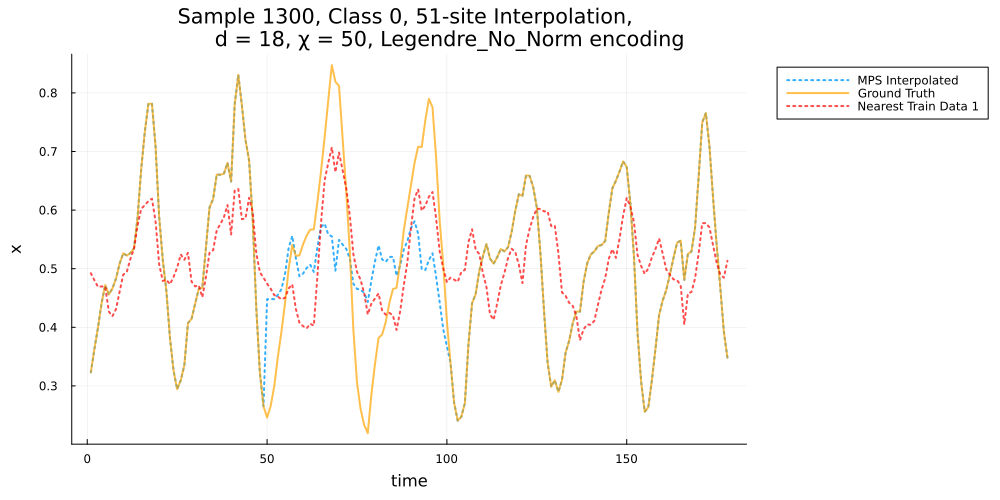

In [154]:
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)
#savefig("../../../../Desktop/test.svg")

╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│    MAE │ 0.127618 │
│ NN_MAE │ 0.105224 │
╰────────┴──────────╯


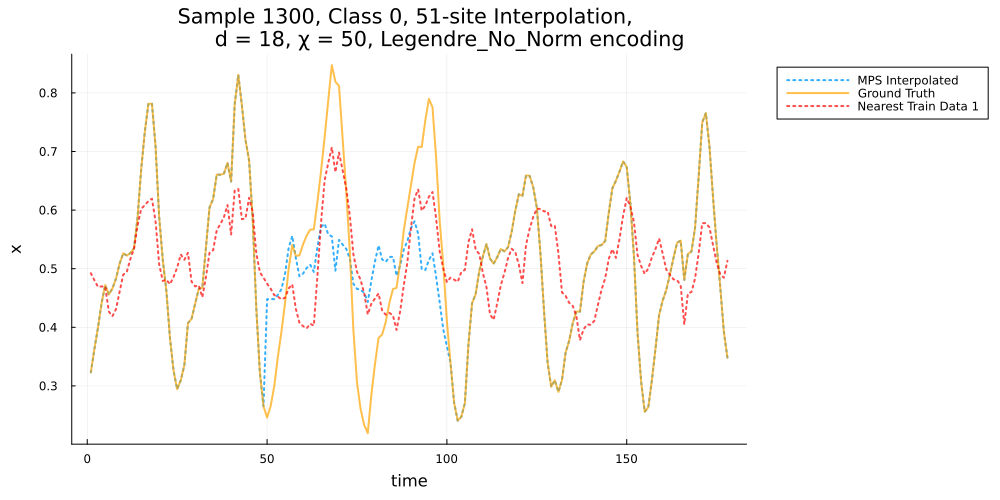

In [155]:
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)

----

In [159]:
svpath_ns = "../../Data/epilepsy/mps_saves/legendreRS_ns_d18_chi50.jld2";
dloc =  "../../Data/epilepsy/datasets/Epilepsy2_RS_200_100.jld2";

In [160]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)

In [161]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc_ns = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 200 training samples and 100 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 18, chi_max = 50

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


In [162]:
mode_range=(-1,1)
xvals=collect(range(mode_range...; step=1E-4))
mode_index=Index(opts_ns.d)
xvals_enc= [get_state(x, opts_ns) for x in xvals]
xvals_enc_it=[ITensor(s, mode_index) for s in xvals_enc];

In [179]:
max_jump=nothing
class = 1
interp_sites = collect(100:150)
instance_idx = 20
stats, p1_ns = any_interpolate_single_timeseries(fc_ns, class, instance_idx, interp_sites, :directMode; 
    NN_baseline=true, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, 
    mode_range=mode_range, xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc, 
    xvals_enc_it=xvals_enc_it, max_jump=max_jump);


(i, x_prev, mx) = (1, -0.019688059319866946, -0.069)
(i, x_prev, mx) = (2, -0.069, -0.0373)
(i, x_prev, mx) = (3, -0.0373, -0.0359)
(i, x_prev, mx) = (4, -0.0359, -0.0369)
(i, x_prev, mx) = (5, -0.0369, 0.0056)
(i, x_prev, mx) = (6, 0.0056, 0.0274)
(i, x_prev, mx) = (7, 0.0274, 0.1349)
(i, x_prev, mx) = (8, 0.1349, 0.215)
(i, x_prev, mx) = (9, 0.215, 0.1698)
(i, x_prev, mx) = (10, 0.1698, 0.181)
(i, x_prev, mx) = (11, 0.181, 0.1395)
(i, x_prev, mx) = (12, 0.1395, 0.1141)
(i, x_prev, mx) = (13, 0.1141, 0.0197)
(i, x_prev, mx) = (14, 0.0197, -0.0404)
(i, x_prev, mx) = (15, -0.0404, -0.0436)
(i, x_prev, mx) = (16, -0.0436, -0.0409)
(i, x_prev, mx) = (17, -0.0409, -0.0553)
(i, x_prev, mx) = (18, -0.0553, -0.0492)
(i, x_prev, mx) = (19, -0.0492, -0.0373)
(i, x_prev, mx) = (20, -0.0373, -0.0578)
(i, x_prev, mx) = (21, -0.0578, -0.097)
(i, x_prev, mx) = (22, -0.097, -0.1679)
(i, x_prev, mx) = (23, -0.1679, -0.0206)
(i, x_prev, mx) = (24, -0.0206, 0.0501)
(i, x_prev, mx) = (25, 0.0501, 0.0946)

╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│    MAE │ 0.0131072 │
│ NN_MAE │ 0.0124749 │
╰────────┴───────────╯


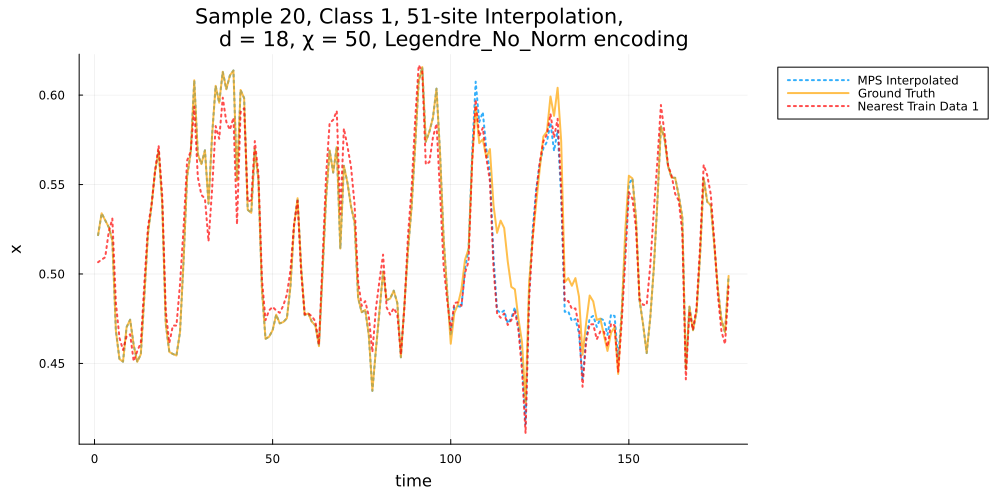

In [180]:
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)
#savefig("ep_1.svg")